# 📌Project Name -Retail Sales Data Cleaning & Exploratory Data Analysis

# 📂 Project Type

**Data Analytics (Python, EDA, Data Cleaning)**

# 📝 Project Summary

**This project focuses on cleaning and analyzing a large, highly messy retail sales dataset containing 50,000 transactions.
The dataset had multiple data quality issues such as missing values, duplicate order IDs, inconsistent city names, invalid dates, negative quantities, extreme price outliers, and incorrect revenue calculations.**

**Using Python and pandas, the data was cleaned by standardizing text fields, handling missing values, fixing date formats, removing duplicates and invalid records, treating outliers using the IQR method, and recalculating final unit prices and revenue using discount percentages.**

**After cleaning, Exploratory Data Analysis (EDA) was performed to understand sales performance, customer behavior, pricing patterns, and geographic trends.
The cleaned and reliable dataset enabled accurate business insights such as top-performing cities and categories, customer type analysis, revenue trends, and discount impact on sales.**

#  Variables Description

**order_id:**
Unique identifier assigned to each customer order.

**order_date:**
Date on which the order was placed.

**city:**
City where the transaction occurred.

**region:**
Geographical region associated with the city.

**category:**
Product category such as Electronics, Fashion, or Grocery.

**product:**
Name of the product sold in the transaction.

**quantity:**
Number of units purchased in a single order.

**unit_price:**
Price of one unit of the product before applying any discount.

**discount_percent:**
Discount percentage applied to the product price.

**final_unit_price:**
Final price of one unit after applying the discount.

**revenue:**
Total revenue generated from the order, calculated as quantity × final unit price.

**payment_method:**
Mode of payment used by the customer (e.g., Credit Card, UPI, Cash).

**customer_type:**
Type of customer placing the order (New or Returning).

**sales_channel:**
Sales channel through which the order was placed (Online or In-Store).

# Univariate Analysis

**Univariate analysis was performed to understand the distribution and behavior of individual variables such as quantity, unit price, discount percentage, and revenue. Measures like mean, median, and frequency counts were used to identify typical values and detect anomalies such as negative quantities, extreme prices, and unusually high discounts.**

# Bivariate Analysis 

**Bivariate analysis examined relationships between two variables, such as discount percentage vs revenue, unit price vs quantity, and customer type vs revenue. This analysis helped identify patterns like higher spending by returning customers, weak correlation between heavy discounts and revenue, and differences in purchasing behavior across sales channels.**

# Multivariate Analysis 

**Multivariate analysis explored interactions among multiple variables including price, quantity, discount, revenue, customer type, category, city, and sales channel. The analysis revealed that revenue is mainly driven by quantity and price rather than discounts, and that online returning customers and specific city–category combinations contribute the most to overall revenue.**

**Import Labraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\vijay\Downloads\retail_sales_50k_messy.csv")
df


,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel
0,100000,06/25/2023,Bengaluru,South,Beauty,Face Wash,1.0,11521.49,0.0,11521.49,11521.49,NaN,New,Online
1,100001,2024-05-17,Kolkata,East,Beauty,Face Wash,2.0,22032.78,15.0,18727.86,37455.72,Credit Card,NaN,Online
2,100002,NaN,Mumbai,West,Fashion,T-Shirt,-1.0,48903.88,10.0,44013.49,-44013.49,NaN,Returning,Online
3,100003,2024-02-03,MUMBAI,NaN,Fashion,Jacket,1.0,13340.77,0.0,13340.77,13340.77,Cash on Delivery,NaN,In-Store
4,100004,12/12/2023,Bangalore,NaN,Beauty,Moisturizer,3.0,3788.15,5.0,3598.74,10796.22,NaN,Returning,In-Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149995,06/15/2024,Mumbai,West,Home & Kitchen,Cookware Set,3.0,46706.12,0.0,46706.12,140118.36,Debit Card,New,Online
49996,149996,09/10/2023,Kolkata,East,Home & Kitchen,Vacuum Cleaner,-1.0,10661.07,0.0,10661.07,-10661.07,UPI,Returning,In-Store
49997,100012,04-03-2024,Bengaluru,South,Beauty,Perfume,2.0,46032.22,15.0,39127.39,78254.78,Cash on Delivery,NaN,Online
49998,149998,01-01-2024,NaN,NaN,Electronics,Smartphone,NaN,32082.46,NaN,NaN,NaN,Credit Card,Returning,Online


In [11]:
df.shape


(50000, 14)

In [56]:


# ==============================
# 2. BASIC INSPECTION
# ==============================
print("Initial Shape:", df.shape)
print(df.info())
print(df.isnull().sum())

# ==============================
# 3. STANDARDIZE TEXT COLUMNS
# ==============================
text_cols = [
    'city',
    'region',
    'category',
    'product',
    'payment_method',
    'customer_type',
    'sales_channel'
]

for col in text_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.lower()
        .str.strip()
    )

# Replace string 'nan' back to actual NaN
df[text_cols] = df[text_cols].replace('nan', np.nan)

# ==============================
# 4. DATE CLEANING
# ==============================
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# ==============================
# 5. REMOVE DUPLICATE ORDERS
# ==============================
df = df.drop_duplicates(subset='order_id')

# ==============================
# 6. HANDLE MISSING VALUES
# ==============================

# Discount percent → fill with 0
df['discount_percent'] = df['discount_percent'].fillna(0)

# Keep discount in valid range (0–100)
df = df[(df['discount_percent'] >= 0) & (df['discount_percent'] <= 100)]

# Fill missing categorical values
df['customer_type'] = df['customer_type'].fillna('unknown')
df['region'] = df['region'].fillna('unknown')
df['city'] = df['city'].fillna('unknown')
df['payment_method'] = df['payment_method'].fillna('unknown')


# Drop rows where critical numeric values are missing
df = df.dropna(subset=['quantity', 'unit_price'])
df = df.dropna(subset=['order_date'])


# ==============================
# 7. REMOVE INVALID QUANTITY
# ==============================
df = df[df['quantity'] > 0]

# ==============================
# 8. REMOVE PRICE OUTLIERS (IQR METHOD)
# ==============================
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1

df = df[
    (df['unit_price'] >= Q1 - 1.5 * IQR) &
    (df['unit_price'] <= Q3 + 1.5 * IQR)
]

# ==============================
# 9. RECALCULATE FINAL PRICE & REVENUE
# ==============================

# Final unit price after discount
df['final_unit_price'] = df['unit_price'] * (1 - df['discount_percent'] / 100)

# Revenue calculation
df['revenue'] = df['quantity'] * df['final_unit_price']

# ==============================
# 10. FINAL DATA CHECK
# ==============================
print("\nAfter Cleaning Shape:", df.shape)
print("\nRemaining NULL values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())


Initial Shape: (32625, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 32625 entries, 0 to 49995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          32625 non-null  int64         
 1   order_date        8154 non-null   datetime64[ns]
 2   city              32625 non-null  object        
 3   region            32625 non-null  object        
 4   category          32625 non-null  object        
 5   product           32625 non-null  object        
 6   quantity          32625 non-null  float64       
 7   unit_price        32625 non-null  float64       
 8   discount_percent  32625 non-null  float64       
 9   final_unit_price  32625 non-null  float64       
 10  revenue           32625 non-null  float64       
 11  payment_method    32625 non-null  object        
 12  customer_type     32625 non-null  object        
 13  sales_channel     32625 non-null  object        
dtype

# SECTION 1 — DATA UNDERSTANDING & CLEANING

In [64]:
df.shape


(50000, 14)

In [66]:
#Percentage of missing values in each column
(df.isnull().mean() * 100).round(2)


order_id             0.00
order_date          24.97
city                 9.00
region              36.61
category             0.00
product              0.00
quantity            16.34
unit_price           1.03
discount_percent    16.85
final_unit_price    30.52
revenue             30.52
payment_method      19.77
customer_type       33.23
sales_channel        0.00
dtype: float64

In [68]:
#Which columns have the highest data quality issues?
df.isnull().sum().sort_values(ascending=False)


region              18306
customer_type       16617
final_unit_price    15258
revenue             15258
order_date          12487
payment_method       9883
discount_percent     8426
quantity             8171
city                 4499
unit_price            516
order_id                0
category                0
product                 0
sales_channel           0
dtype: int64

In [70]:
#How many duplicate order IDs are present?
df.duplicated(subset='order_id').sum()


110

In [72]:
#How many invalid or negative quantities exist?
(df['quantity'] <= 0).sum()


8443

In [76]:
#How many records have missing or incorrect dates?
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


In [78]:
df['order_date'].isnull().sum()

37425

In [80]:
#List all inconsistent city name variations
df['city'].value_counts()


city
delhi        4645
MUMBAI       4636
Chennai      4582
Pune         4582
Bengaluru    4556
Delhi        4541
Bangalore    4526
Hyderabad    4483
Kolkata      4478
Mumbai       4472
Name: count, dtype: int64

In [82]:
df['city'].str.lower().str.strip().value_counts()


city
delhi        9186
mumbai       9108
chennai      4582
pune         4582
bengaluru    4556
bangalore    4526
hyderabad    4483
kolkata      4478
Name: count, dtype: int64

In [84]:
#Which rows contain extreme price outliers?
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['unit_price'] < Q1 - 1.5 * IQR) |
    (df['unit_price'] > Q3 + 1.5 * IQR)
]

outliers


,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel
41,100041,NaT,Chennai,South,Fashion,Jacket,2.0,285198.56,15.0,242418.78,484837.56,Credit Card,New,Online
45,100045,NaT,NaN,NaN,Fashion,Sneakers,3.0,166200.56,0.0,166200.56,498601.68,NaN,New,Online
273,100273,2024-12-12,delhi,NaN,Home & Kitchen,Cookware Set,3.0,139005.81,15.0,118154.94,354464.82,Debit Card,New,Online
518,100518,NaT,Mumbai,West,Home & Kitchen,Cookware Set,4.0,474455.50,NaN,NaN,NaN,Debit Card,Returning,In-Store
626,100626,NaT,NaN,NaN,Electronics,Headphones,-1.0,153015.50,20.0,122412.40,-122412.40,Credit Card,Returning,In-Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49661,149661,2023-10-30,Kolkata,East,Home & Kitchen,Mixer Grinder,1.0,300873.17,0.0,300873.17,300873.17,Cash on Delivery,New,In-Store
49793,149793,NaT,Chennai,South,Electronics,Smartwatch,3.0,458605.12,15.0,389814.35,1169443.05,Debit Card,NaN,Online
49869,149869,2023-04-18,Hyderabad,South,Fashion,T-Shirt,4.0,379342.50,NaN,NaN,NaN,Debit Card,New,Online
49930,149930,NaT,MUMBAI,NaN,Electronics,Smartwatch,3.0,432850.82,20.0,346280.66,1038841.98,Credit Card,New,In-Store


In [86]:
#How many rows have missing revenue values?
df['revenue'].isnull().sum()


15258

In [101]:
df.shape[0]


50000

# Section 2 — Descriptive EDA

In [103]:
# ==============================
# 1. TOTAL REVENUE
# ==============================
total_revenue = df['revenue'].sum()
print("1. Total Revenue Generated:", round(total_revenue, 2))

# ==============================
# 2. AVERAGE ORDER VALUE
# ==============================
avg_order_value = df.groupby('order_id')['revenue'].sum().mean()
print("2. Average Order Value:", round(avg_order_value, 2))

# ==============================
# 3. CITY WITH HIGHEST REVENUE
# ==============================
top_city = df.groupby('city')['revenue'].sum().sort_values(ascending=False)
print("\n3. City with Highest Revenue:")
print(top_city.head(1))

# ==============================
# 4. BEST PERFORMING REGION
# ==============================
top_region = df.groupby('region')['revenue'].sum().sort_values(ascending=False)
print("\n4. Best Performing Region:")
print(top_region)

# ==============================
# 5. TOP 10 PRODUCTS BY REVENUE
# ==============================
top_products = df.groupby('product')['revenue'].sum().sort_values(ascending=False).head(10)
print("\n5. Top 10 Selling Products by Revenue:")
print(top_products)

# ==============================
# 6. CATEGORY WITH HIGHEST REVENUE
# ==============================
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)
print("\n6. Category Contributing Most to Revenue:")
print(category_revenue)

# ==============================
# 7. LEAST PERFORMING CATEGORY
# ==============================
least_category = category_revenue.tail(1)
print("\n7. Least Performing Category:")
print(least_category)

# ==============================
# 8. MEDIAN QUANTITY PER ORDER
# ==============================
median_quantity = df.groupby('order_id')['quantity'].sum().median()
print("\n8. Median Quantity per Order:", median_quantity)

# ==============================
# 9. MOST USED PAYMENT METHOD
# ==============================
top_payment = df['payment_method'].value_counts()
print("\n9. Most Frequently Used Payment Method:")
print(top_payment.head(1))

# ==============================
# 10. ONLINE VS IN-STORE SALES %
# ==============================
channel_percentage = df['sales_channel'].value_counts(normalize=True) * 100
print("\n10. Sales Channel Percentage (Online vs In-Store):")
print(channel_percentage.round(2))


1. Total Revenue Generated: 1565856303.79
2. Average Order Value: 31386.18

3. City with Highest Revenue:
city
Kolkata    1.469084e+08
Name: revenue, dtype: float64

4. Best Performing Region:
region
South    4.171997e+08
West     2.803629e+08
East     1.469084e+08
North    1.387458e+08
Name: revenue, dtype: float64

5. Top 10 Selling Products by Revenue:
product
Smartwatch        1.033898e+08
Mixer Grinder     1.025541e+08
Jeans             1.018996e+08
T-Shirt           1.016934e+08
Face Wash         1.016844e+08
Water Purifier    9.896318e+07
Jacket            9.841251e+07
Sneakers          9.818181e+07
Laptop            9.743855e+07
Vacuum Cleaner    9.741975e+07
Name: revenue, dtype: float64

6. Category Contributing Most to Revenue:
category
Fashion           4.001874e+08
Home & Kitchen    3.907163e+08
Beauty            3.886121e+08
Electronics       3.863405e+08
Name: revenue, dtype: float64

7. Least Performing Category:
category
Electronics    3.863405e+08
Name: revenue, dtype

# Section 3 — Time-based Analysis

In [109]:
# Ensure date column is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Recalculate revenue if needed
df['final_unit_price'] = df['unit_price'] * (1 - df['discount_percent'] / 100)
df['revenue'] = df['quantity'] * df['final_unit_price']

print("\nSECTION 3 — TIME-BASED ANALYSIS RESULTS\n")

# ==============================
# CREATE TIME FEATURES
# ==============================
df['month'] = df['order_date'].dt.to_period('M')
df['month_name'] = df['order_date'].dt.month_name()
df['quarter'] = df['order_date'].dt.to_period('Q')
df['weekday'] = df['order_date'].dt.day_name()
df['is_weekend'] = df['order_date'].dt.weekday >= 5


# 1. MONTHLY REVENUE TREND
# ==============================
monthly_revenue = df.groupby('month')['revenue'].sum()
print("1. Monthly Revenue Trend:")
print(monthly_revenue)

# ==============================
# 2. MONTH WITH HIGHEST SALES
# ==============================
highest_month = monthly_revenue.idxmax()
print("\n2. Month with Highest Sales:", highest_month)

# ==============================
# 3. MONTH WITH LOWEST SALES
# ==============================
lowest_month = monthly_revenue.idxmin()
print("3. Month with Lowest Sales:", lowest_month)

# ==============================
# 4. SEASONALITY PATTERN
# ==============================
seasonality = df.groupby(df['order_date'].dt.month)['revenue'].mean()
print("\n4. Average Revenue by Month (Seasonality Check):")
print(seasonality)

# ==============================
# 5. AVERAGE ORDER VALUE MONTH-TO-MONTH
# ==============================
monthly_aov = df.groupby('month')['revenue'].mean()
print("\n5. Average Order Value by Month:")
print(monthly_aov)

# ==============================
# 6. WEEKEND VS WEEKDAY SALES
# ==============================
weekend_sales = df.groupby('is_weekend')['revenue'].sum()
print("\n6. Weekend vs Weekday Revenue:")
print(weekend_sales)

# ==============================
# 7. QUARTERLY REVENUE CONTRIBUTION
# ==============================
quarterly_revenue = df.groupby('quarter')['revenue'].sum().sort_values(ascending=False)
print("\n7. Revenue Contribution by Quarter:")
print(quarterly_revenue)


SECTION 3 — TIME-BASED ANALYSIS RESULTS

1. Monthly Revenue Trend:
month
2023-01    1.550537e+07
2023-02    1.412813e+07
2023-03    1.545815e+07
2023-04    1.488089e+07
2023-05    1.570314e+07
2023-06    1.684754e+07
2023-07    1.395844e+07
2023-08    1.567796e+07
2023-09    1.806607e+07
2023-10    1.663131e+07
2023-11    1.815553e+07
2023-12    1.704955e+07
2024-01    1.525954e+07
2024-02    1.425626e+07
2024-03    1.686265e+07
2024-04    1.360376e+07
2024-05    1.697000e+07
2024-06    1.364890e+07
2024-07    1.682408e+07
2024-08    1.969887e+07
2024-09    1.427643e+07
2024-10    1.888980e+07
2024-11    1.333939e+07
2024-12    1.437039e+07
Freq: M, Name: revenue, dtype: float64

2. Month with Highest Sales: 2024-08
3. Month with Lowest Sales: 2024-11

4. Average Revenue by Month (Seasonality Check):
order_date
1.0     40640.572217
2.0     43601.220879
3.0     44154.092393
4.0     40634.310016
5.0     44453.249617
6.0     42533.393128
7.0     39925.455609
8.0     50251.166195
9.0     

# Section 4 — Customer Behavior

In [112]:
# Ensure revenue is correct
df['final_unit_price'] = df['unit_price'] * (1 - df['discount_percent'] / 100)
df['revenue'] = df['quantity'] * df['final_unit_price']

print("\nSECTION 4 — CUSTOMER BEHAVIOR RESULTS\n")

# ==============================
# 1. DO RETURNING CUSTOMERS SPEND MORE THAN NEW?
# ==============================
avg_spend = df.groupby('customer_type')['revenue'].mean()
print("1. Average Spend per Transaction by Customer Type:")
print(avg_spend)

# ==============================
# 2. REVENUE SHARE BY CUSTOMER TYPE
# ==============================
revenue_share = df.groupby('customer_type')['revenue'].sum()
revenue_share_percent = (revenue_share / revenue_share.sum()) * 100

print("\n2. Revenue Share by Customer Type (%):")
print(revenue_share_percent.round(2))

# ==============================
# 3. AVERAGE QUANTITY PER CUSTOMER TYPE
# ==============================
avg_quantity = df.groupby('customer_type')['quantity'].mean()
print("\n3. Average Quantity per Customer Type:")
print(avg_quantity.round(2))

# ==============================
# 4. CITY WITH HIGHEST RETURNING-CUSTOMER RATIO
# ==============================
customer_counts = df.groupby(['city', 'customer_type']).size().unstack(fill_value=0)

customer_counts['returning_ratio'] = (
    customer_counts.get('returning', 0) /
    customer_counts.sum(axis=1)
)

top_returning_city = customer_counts.sort_values(
    by='returning_ratio', ascending=False
).head(1)

print("\n4. City with Highest Returning-Customer Ratio:")
print(top_returning_city[['returning_ratio']])

# ==============================
# 5. ARE DISCOUNTS MORE COMMON FOR NEW CUSTOMERS?
# ==============================
avg_discount = df.groupby('customer_type')['discount_percent'].mean()
print("\n5. Average Discount Percent by Customer Type:")
print(avg_discount.round(2))


SECTION 4 — CUSTOMER BEHAVIOR RESULTS

1. Average Spend per Transaction by Customer Type:
customer_type
New          45881.409064
Returning    45300.189447
Name: revenue, dtype: float64

2. Revenue Share by Customer Type (%):
customer_type
New          50.33
Returning    49.67
Name: revenue, dtype: float64

3. Average Quantity per Customer Type:
customer_type
New          1.8
Returning    1.8
Name: quantity, dtype: float64

4. City with Highest Returning-Customer Ratio:
customer_type  returning_ratio
city                          
Bangalore                  0.0

5. Average Discount Percent by Customer Type:
customer_type
New          10.03
Returning     9.95
Name: discount_percent, dtype: float64


# Section 5 — Pricing & Discount Insights

In [115]:
# Ensure correct pricing & revenue
df['final_unit_price'] = df['unit_price'] * (1 - df['discount_percent'] / 100)
df['revenue'] = df['quantity'] * df['final_unit_price']

print("\nSECTION 5 — PRICING & DISCOUNT INSIGHTS RESULTS\n")

# ==============================
# 1. AVERAGE DISCOUNT PERCENTAGE
# ==============================
avg_discount = df['discount_percent'].mean()
print("1. Average Discount Percentage Overall:", round(avg_discount, 2), "%")

# ==============================
# 2. CATEGORY WITH HIGHEST DISCOUNTS
# ==============================
category_discount = df.groupby('category')['discount_percent'].mean().sort_values(ascending=False)
print("\n2. Average Discount by Category:")
print(category_discount.round(2))

# ==============================
# 3. DO HIGHER DISCOUNTS INCREASE REVENUE?
# ==============================
discount_revenue_corr = df[['discount_percent', 'revenue']].corr()
print("\n3. Correlation Between Discount Percent and Revenue:")
print(discount_revenue_corr)

# ==============================
# 4. CORRELATION: DISCOUNT, PRICE & QUANTITY
# ==============================
correlation_matrix = df[['discount_percent', 'unit_price', 'quantity']].corr()
print("\n4. Correlation Matrix (Discount, Price, Quantity):")
print(correlation_matrix)

# ==============================
# 5. LOSS-MAKING OR SUSPICIOUS TRANSACTIONS
# ==============================
suspicious = df[
    (df['revenue'] <= 0) |
    (df['final_unit_price'] <= 0) |
    (df['discount_percent'] == 100)
]

print("\n5. Suspicious or Loss-Making Transactions:")
print(suspicious[['order_id', 'product', 'quantity', 'unit_price',
                  'discount_percent', 'final_unit_price', 'revenue']])


SECTION 5 — PRICING & DISCOUNT INSIGHTS RESULTS

1. Average Discount Percentage Overall: 9.97 %

2. Average Discount by Category:
category
Beauty            9.99
Electronics       9.99
Home & Kitchen    9.94
Fashion           9.94
Name: discount_percent, dtype: float64

3. Correlation Between Discount Percent and Revenue:
                  discount_percent   revenue
discount_percent          1.000000 -0.042607
revenue                  -0.042607  1.000000

4. Correlation Matrix (Discount, Price, Quantity):
                  discount_percent  unit_price  quantity
discount_percent          1.000000   -0.000583 -0.005984
unit_price               -0.000583    1.000000  0.001559
quantity                 -0.005984    0.001559  1.000000

5. Suspicious or Loss-Making Transactions:
       order_id         product  quantity  unit_price  discount_percent  \
2        100002         T-Shirt      -1.0    48903.88              10.0   
14       100014  Vacuum Cleaner      -1.0    45474.59             

# Section 6 — Geographic Insights

In [118]:
# Ensure correct revenue calculation
df['final_unit_price'] = df['unit_price'] * (1 - df['discount_percent'] / 100)
df['revenue'] = df['quantity'] * df['final_unit_price']

print("\nSECTION 6 — GEOGRAPHIC INSIGHTS RESULTS\n")

# ==============================
# 1. TOP 5 CITIES BY REVENUE
# ==============================
top_cities = (
    df.groupby('city')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("1. Top 5 Cities Contributing Most Revenue:")
print(top_cities)

# ==============================
# 2. LOWEST PERFORMING REGION
# ==============================
region_revenue = (
    df.groupby('region')['revenue']
    .sum()
    .sort_values()
)

print("\n2. Region with Lowest Performance:")
print(region_revenue.head(1))

# ==============================
# 3. CATEGORY PREFERENCE ACROSS REGIONS
# ==============================
category_region = pd.pivot_table(
    df,
    values='revenue',
    index='region',
    columns='category',
    aggfunc='sum'
)

print("\n3. Category Preference Differences Across Regions:")
print(category_region)

# ==============================
# 4. CITY THAT BUYS MOST ELECTRONICS
# ==============================
electronics_city = (
    df[df['category'] == 'electronics']
    .groupby('city')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

print("\n4. City Buying the Most Electronics:")
print(electronics_city)

# ==============================
# 5. CITY THAT PREFERS FASHION PRODUCTS
# ==============================
fashion_city = (
    df[df['category'] == 'fashion']
    .groupby('city')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

print("\n5. City Preferring Fashion Products:")
print(fashion_city)


SECTION 6 — GEOGRAPHIC INSIGHTS RESULTS

1. Top 5 Cities Contributing Most Revenue:
city
Kolkata      1.462177e+08
delhi        1.439115e+08
Bengaluru    1.431116e+08
MUMBAI       1.421835e+08
Bangalore    1.420088e+08
Name: revenue, dtype: float64

2. Region with Lowest Performance:
region
North    1.371339e+08
Name: revenue, dtype: float64

3. Category Preference Differences Across Regions:
category        Beauty   Electronics       Fashion  Home & Kitchen
region                                                            
East      4.053836e+07  3.239993e+07  3.519121e+07    3.808824e+07
North     3.380452e+07  3.559276e+07  3.204488e+07    3.569177e+07
South     1.019548e+08  1.061708e+08  1.050828e+08    1.004706e+08
West      6.668630e+07  6.727470e+07  7.489916e+07    6.839882e+07

4. City Buying the Most Electronics:
Series([], Name: revenue, dtype: float64)

5. City Preferring Fashion Products:
Series([], Name: revenue, dtype: float64)


# Section 7 — Outliers & Anomaly Detection

In [121]:
# Ensure correct revenue calculation
df['final_unit_price'] = df['unit_price'] * (1 - df['discount_percent'] / 100)
df['revenue'] = df['quantity'] * df['final_unit_price']

print("\nSECTION 7 — OUTLIERS & ANOMALY DETECTION RESULTS\n")

# ==============================
# 1. PRICE OUTLIERS USING IQR
# ==============================
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1

price_outliers = df[
    (df['unit_price'] < Q1 - 1.5 * IQR) |
    (df['unit_price'] > Q3 + 1.5 * IQR)
]

print("1. Number of Price Outliers Detected:", price_outliers.shape[0])

# ==============================
# 2. ABNORMALLY HIGH REVENUE ORDERS
# ==============================
Q1_rev = df['revenue'].quantile(0.25)
Q3_rev = df['revenue'].quantile(0.75)
IQR_rev = Q3_rev - Q1_rev

high_revenue_orders = df[df['revenue'] > Q3_rev + 1.5 * IQR_rev]

print("2. Number of Abnormally High Revenue Orders:", high_revenue_orders.shape[0])

# ==============================
# 3. ARE OUTLIERS ERRORS OR PREMIUM SALES?
# ==============================
outlier_samples = high_revenue_orders[
    ['order_id', 'product', 'quantity', 'unit_price', 'discount_percent', 'revenue']
].head(10)

print("\n3. Sample High-Revenue Orders (Manual Review):")
print(outlier_samples)

# ==============================
# 4. IMPACT OF REMOVING OUTLIERS ON AVG REVENUE
# ==============================
avg_revenue_before = df['revenue'].mean()

df_no_outliers = df[
    df['revenue'] <= Q3_rev + 1.5 * IQR_rev
]

avg_revenue_after = df_no_outliers['revenue'].mean()

print("\n4. Average Revenue BEFORE Removing Outliers:", round(avg_revenue_before, 2))
print("   Average Revenue AFTER Removing Outliers:", round(avg_revenue_after, 2))


SECTION 7 — OUTLIERS & ANOMALY DETECTION RESULTS

1. Number of Price Outliers Detected: 491
2. Number of Abnormally High Revenue Orders: 548

3. Sample High-Revenue Orders (Manual Review):
     order_id         product  quantity  unit_price  discount_percent  \
12     100012       Face Wash       4.0    47516.45               0.0   
41     100041          Jacket       2.0   285198.56              15.0   
45     100045        Sneakers       3.0   166200.56               0.0   
51     100051        Sneakers       4.0    46967.75               5.0   
273    100273    Cookware Set       3.0   139005.81              15.0   
295    100295          Jacket       4.0    46681.71               5.0   
513    100513      Hair Dryer       4.0    47572.03               0.0   
620    100620   Mixer Grinder       4.0    46755.69               0.0   
637    100637    Cookware Set       4.0    48699.15               5.0   
669    100669  Water Purifier       2.0   477872.04               0.0   

      

# Section 8 — Visualization Tasks

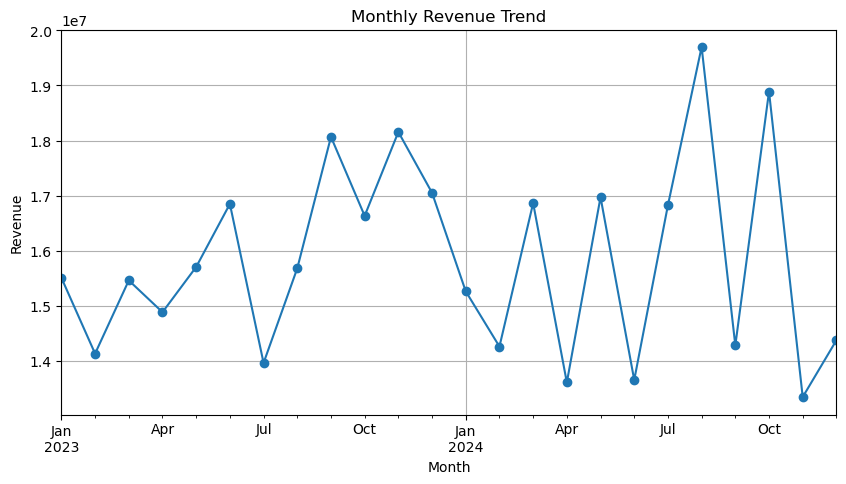

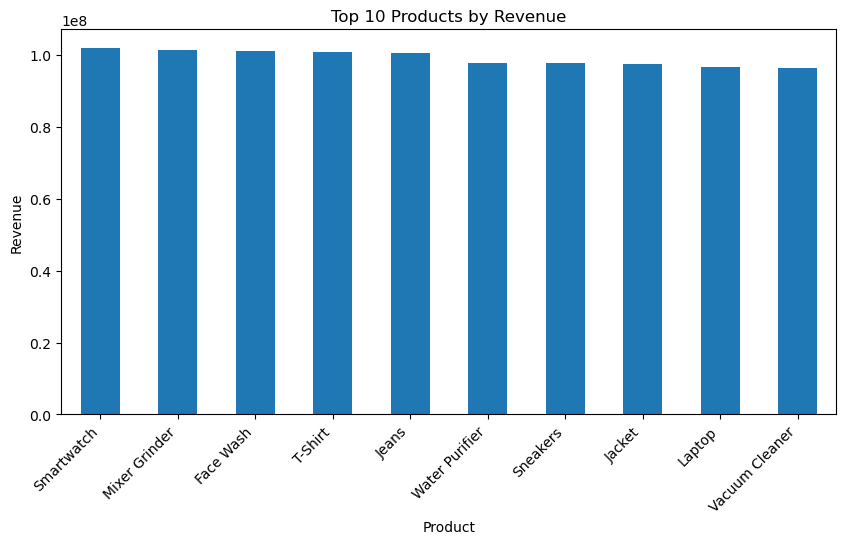

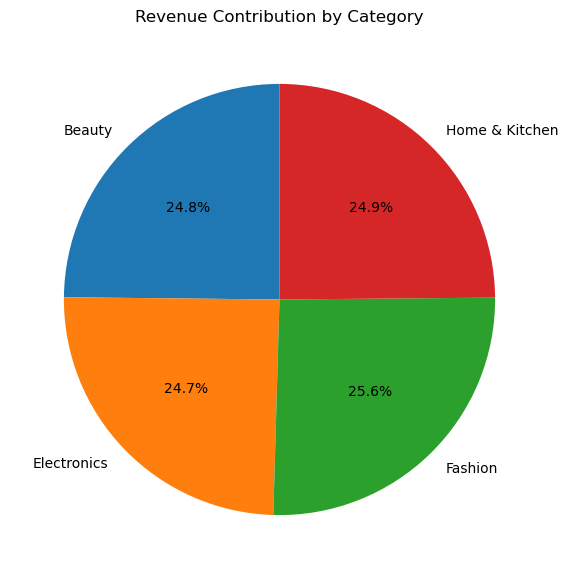

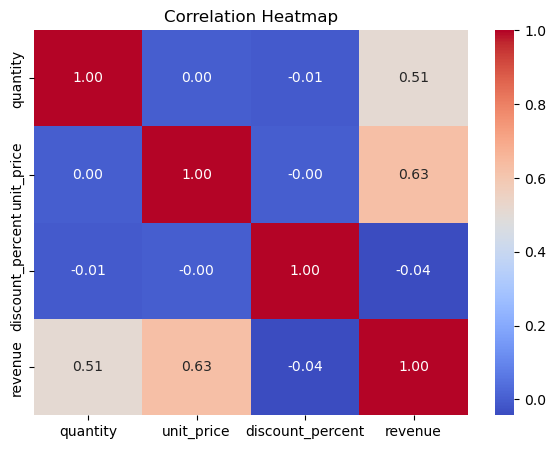

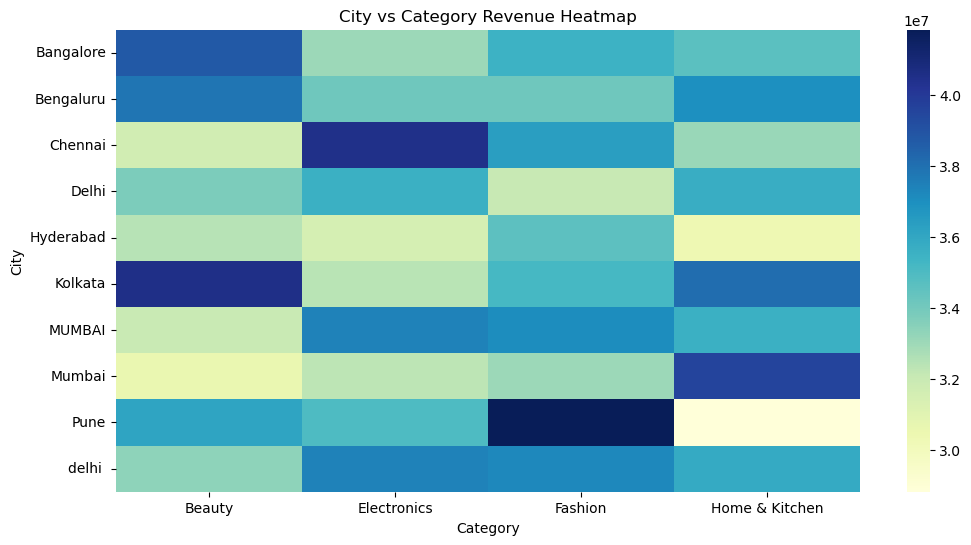

In [13]:
# Ensure date & revenue correctness
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['final_unit_price'] = df['unit_price'] * (1 - df['discount_percent'] / 100)
df['revenue'] = df['quantity'] * df['final_unit_price']

# ==============================
# 1. MONTHLY REVENUE LINE CHART
# ==============================
monthly_revenue = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum()

plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

# ==============================
# 2. TOP PRODUCTS BAR CHART
# ==============================
top_products = (
    df.groupby('product')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.show()

# ==============================
# 3. CATEGORY REVENUE PIE CHART
# ==============================
category_revenue = df.groupby('category')['revenue'].sum()

plt.figure(figsize=(7, 7))
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Revenue Contribution by Category")
plt.ylabel("")
plt.show()

# ==============================
# 4. HEATMAP OF CORRELATIONS
# ==============================
corr_matrix = df[['quantity', 'unit_price', 'discount_percent', 'revenue']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ==============================
# 5. CITY VS CATEGORY PIVOT VISUALIZATION
# ==============================
city_category_pivot = pd.pivot_table(
    df,
    values='revenue',
    index='city',
    columns='category',
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
sns.heatmap(city_category_pivot, cmap='YlGnBu')
plt.title("City vs Category Revenue Heatmap")
plt.xlabel("Category")
plt.ylabel("City")
plt.show()